In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%pip install pandasql
from pandasql import sqldf
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
#Elbow method
from scipy.spatial.distance import cdist

from sklearn.preprocessing import StandardScaler

In [2]:
TC  = pd.read_csv("C:/Users/matages/Desktop/Customer Segmentation/Clean_data/Transaction_Clean.csv")
CDC = pd.read_csv("C:/Users/matages/Desktop/Customer Segmentation/Clean_data/Customer_Demographe_clean.csv")

In [3]:
TC = TC.iloc[:,1:]
CDC = CDC.iloc[:,1:]

In [4]:
print(TC.shape)
print(CDC.shape)

(19803, 14)
(3912, 14)


In [5]:
TC

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,802.26
19799,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,104.24
19800,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,1592.19
19801,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,91.15


In [65]:
len(set(TC["customer_id"]))

3494

In [6]:
RFM = TC[['transaction_date',"customer_id"]].groupby("customer_id").agg(['max'])
RFM = RFM['transaction_date']
RFM = RFM.reset_index()

In [7]:
RFM["max"] = pd.to_datetime(RFM["max"], format='%Y-%m-%d')
RFM

,customer_id,max
0,1,2017-12-23
1,2,2017-08-24
2,3,2017-09-19
3,4,2017-06-18
4,5,2017-12-14
...,...,...
3489,3497,2017-11-08
3490,3498,2017-08-25
3491,3499,2017-11-09
3492,3500,2017-08-08


In [8]:
d = []
for i in range(3494):
    d.append('2018-1-1')
RFM["today"] = pd.to_datetime(d)
RFM

,customer_id,max,today
0,1,2017-12-23,2018-01-01
1,2,2017-08-24,2018-01-01
2,3,2017-09-19,2018-01-01
3,4,2017-06-18,2018-01-01
4,5,2017-12-14,2018-01-01
...,...,...,...
3489,3497,2017-11-08,2018-01-01
3490,3498,2017-08-25,2018-01-01
3491,3499,2017-11-09,2018-01-01
3492,3500,2017-08-08,2018-01-01


In [9]:
RFM["Recency"] = (RFM['today'] - RFM['max']).dt.days
RFM.sort_values("Recency")

,customer_id,max,today,Recency
1502,1506,2017-12-30,2018-01-01,2
3010,3016,2017-12-30,2018-01-01,2
3275,3283,2017-12-30,2018-01-01,2
997,1000,2017-12-30,2018-01-01,2
1325,1328,2017-12-30,2018-01-01,2
...,...,...,...,...
821,822,2017-02-05,2018-01-01,330
1540,1544,2017-02-04,2018-01-01,331
1842,1846,2017-01-31,2018-01-01,335
2130,2135,2017-01-26,2018-01-01,340


In [10]:
Frequency  = TC['customer_id'].value_counts()
Frequency = Frequency.reset_index()
Frequency.sort_values('customer_id')

,customer_id,count
46,1,11
3040,2,3
465,3,8
3262,4,2
1211,5,6
...,...,...
2921,3497,3
1598,3498,6
1084,3499,7
1466,3500,6


In [11]:
RFM = RFM.merge(Frequency, on='customer_id', how='left')
RFM

,customer_id,max,today,Recency,count
0,1,2017-12-23,2018-01-01,9,11
1,2,2017-08-24,2018-01-01,130,3
2,3,2017-09-19,2018-01-01,104,8
3,4,2017-06-18,2018-01-01,197,2
4,5,2017-12-14,2018-01-01,18,6
...,...,...,...,...,...
3489,3497,2017-11-08,2018-01-01,54,3
3490,3498,2017-08-25,2018-01-01,129,6
3491,3499,2017-11-09,2018-01-01,53,7
3492,3500,2017-08-08,2018-01-01,146,6


In [12]:
Monetary = TC[['list_price',"customer_id"]].groupby("customer_id").agg(['sum'])
Monetary = Monetary['list_price']
Monetary = Monetary.reset_index()
Monetary

,customer_id,sum
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20
...,...,...
3489,3497,3744.07
3490,3498,5177.06
3491,3499,7673.48
3492,3500,4922.41


In [13]:
RFM = RFM.merge(Monetary, on='customer_id', how='left')
RFM

,customer_id,max,today,Recency,count,sum
0,1,2017-12-23,2018-01-01,9,11,9084.45
1,2,2017-08-24,2018-01-01,130,3,4149.07
2,3,2017-09-19,2018-01-01,104,8,9888.23
3,4,2017-06-18,2018-01-01,197,2,1047.72
4,5,2017-12-14,2018-01-01,18,6,5903.20
...,...,...,...,...,...,...
3489,3497,2017-11-08,2018-01-01,54,3,3744.07
3490,3498,2017-08-25,2018-01-01,129,6,5177.06
3491,3499,2017-11-09,2018-01-01,53,7,7673.48
3492,3500,2017-08-08,2018-01-01,146,6,4922.41


In [14]:
RFM = RFM[['customer_id','Recency','count','sum']]
RFM.columns = ['customer_id','Recency','Frequency','Monetary']
RFM

,customer_id,Recency,Frequency,Monetary
0,1,9,11,9084.45
1,2,130,3,4149.07
2,3,104,8,9888.23
3,4,197,2,1047.72
4,5,18,6,5903.20
...,...,...,...,...
3489,3497,54,3,3744.07
3490,3498,129,6,5177.06
3491,3499,53,7,7673.48
3492,3500,146,6,4922.41


In [15]:
RFM_Cluster = RFM[['Recency','Frequency','Monetary']]

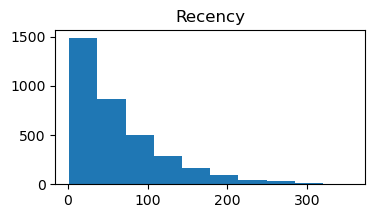

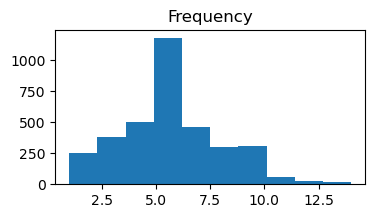

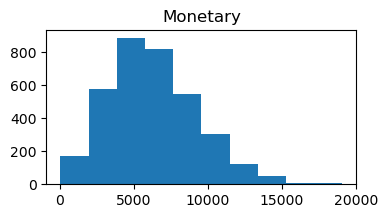

In [16]:
for i in RFM_Cluster.columns :
    plt.figure(figsize =(4,2))
    plt.hist(RFM_Cluster[i])
    plt.title(i)
    plt.show()

In [17]:
scaler = StandardScaler() 
RFM_Cluster = scaler.fit_transform(RFM_Cluster)
RFM_Cluster

array([[-0.93163833,  2.30755079,  0.95213386],
       [ 1.14120008, -1.1544566 , -0.72335914],
       [ 0.69579679,  1.00929802,  1.22500601],
       ...,
       [-0.17787891,  0.57654709,  0.47312913],
       [ 1.41529442,  0.14379617, -0.46082094],
       [ 0.38744066, -1.1544566 , -1.61591906]])

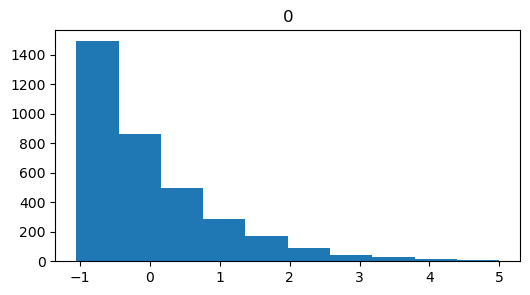

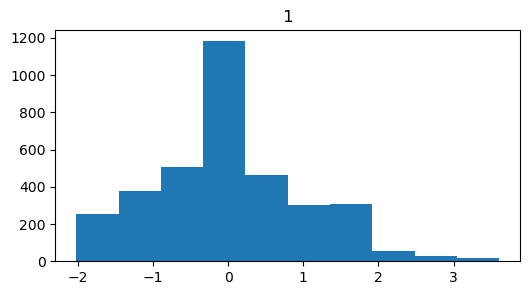

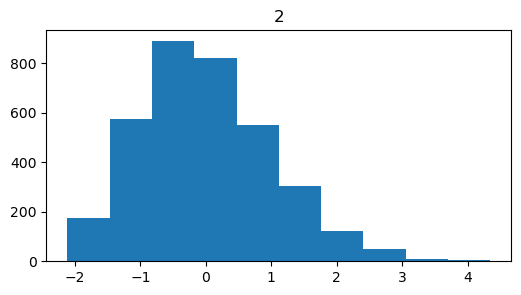

In [18]:
for i in range(3) :
    plt.figure(figsize =(6,3))
    plt.hist(RFM_Cluster[:,i])
    plt.title(i)
    plt.show()

In [19]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Cluster)
    kmeanModel.fit(RFM_Cluster)
    distortions.append(sum(np.min(cdist(RFM_Cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / RFM_Cluster.shape[0])

C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

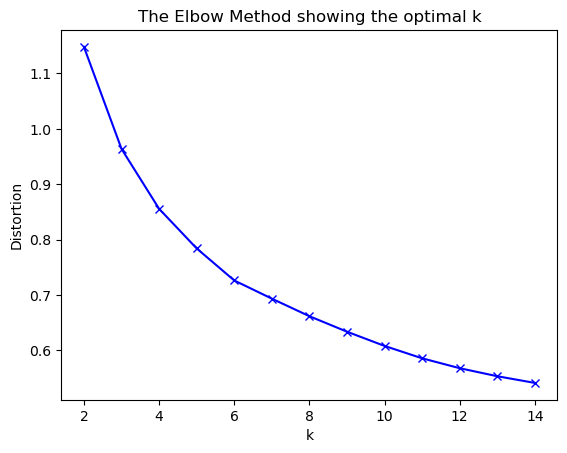

In [20]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#distortion = the values calculated with the cost function

In [21]:
model = KMeans(n_clusters=6)
model = model.fit(RFM_Cluster)

C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
model.labels_

array([3, 4, 1, ..., 1, 4, 5])

In [23]:
RFM['Kmean'] = model.labels_

C:\Users\matages\AppData\Local\Temp\ipykernel_2876\2812814078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['Kmean'] = model.labels_


In [24]:
RFM[["Kmean","Recency","Frequency","Monetary"]].groupby('Kmean').aggregate(['mean'])

,Recency,Frequency,Monetary
,mean,mean,mean
Kmean,,,
0,29.491731,5.286659,5526.588953
1,38.742293,7.358816,8393.905771
2,202.605839,2.770073,2952.083869
3,33.284153,9.846995,11732.416475
4,119.815041,5.396341,6159.032988
5,56.906832,3.139752,3087.621646


In [25]:
dict_kmean = {   0:"4m-5-6.1k(Can’t Lose Them)",
                 1:"1m-7-8.3k(Loyal Customer)",
                 2:"1m-5-5.4k(Can’t Lose Them))",
                 3:"2m-3-3.0k(Need Attention)",
                 4:"6m-2-3.0k(Lost)",
                 5:"1m-9-11.7k(Loyal Customer)"
             }
dict_kmean

{0: '4m-5-6.1k(Can’t Lose Them)',
 1: '1m-7-8.3k(Loyal Customer)',
 2: '1m-5-5.4k(Can’t Lose Them))',
 3: '2m-3-3.0k(Need Attention)',
 4: '6m-2-3.0k(Lost)',
 5: '1m-9-11.7k(Loyal Customer)'}

In [26]:
RFM = RFM.replace({"Kmean": dict_kmean})
RFM

,customer_id,Recency,Frequency,Monetary,Kmean
0,1,9,11,9084.45,2m-3-3.0k(Need Attention)
1,2,130,3,4149.07,6m-2-3.0k(Lost)
2,3,104,8,9888.23,1m-7-8.3k(Loyal Customer)
3,4,197,2,1047.72,1m-5-5.4k(Can’t Lose Them))
4,5,18,6,5903.20,4m-5-6.1k(Can’t Lose Them)
...,...,...,...,...,...
3489,3497,54,3,3744.07,1m-9-11.7k(Loyal Customer)
3490,3498,129,6,5177.06,6m-2-3.0k(Lost)
3491,3499,53,7,7673.48,1m-7-8.3k(Loyal Customer)
3492,3500,146,6,4922.41,6m-2-3.0k(Lost)


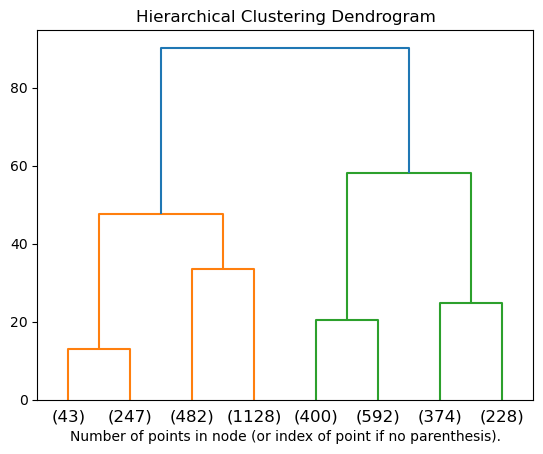

In [27]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(RFM_Cluster)

import matplotlib.pyplot as plt
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [28]:
model = AgglomerativeClustering(n_clusters=8)
model = model.fit(RFM_Cluster)

In [29]:
model.labels_

array([3, 2, 5, ..., 6, 0, 4], dtype=int64)

In [30]:
RFM['Hie'] = model.labels_
RFM[["Hie","Recency","Frequency","Monetary"]].groupby('Hie').aggregate(['mean'])

,Recency,Frequency,Monetary
,mean,mean,mean
Hie,,,
0,205.175439,4.008772,4497.250395
1,89.468880,5.547718,6368.056929
2,127.465241,3.088235,3094.556952
3,26.848276,10.203448,11890.355172
4,39.650338,3.364865,3412.746824
5,53.166362,7.928702,9137.166856
6,22.786575,6.480207,7255.465921
7,25.765000,5.017500,5018.839550


In [31]:
dict_kmean = {   0:"7m-4.0 -4.4k(lose)",
                 1:"3m-5.5 -6.3k(can't lose)",
                 2:"4m-3.0 -3.0k(Almost lose)",
                 3:"1m-10.2-11(champion)",
                 4:"1m-3.3 -3.4k(recently)",
                 5:"2m-7.9 -9.1k(loyalty)",
                 6:"1m-6.4 -7.2k(Becoming loyalty)",
                 7:"1m-5.0 -5.0k(Potential )"
             }
dict_kmean

{0: '7m-4.0 -4.4k(lose)',
 1: "3m-5.5 -6.3k(can't lose)",
 2: '4m-3.0 -3.0k(Almost lose)',
 3: '1m-10.2-11(champion)',
 4: '1m-3.3 -3.4k(recently)',
 5: '2m-7.9 -9.1k(loyalty)',
 6: '1m-6.4 -7.2k(Becoming loyalty)',
 7: '1m-5.0 -5.0k(Potential )'}

# try using mean in Monetary

In [32]:
RFM2 = RFM.iloc[:,:3]

In [33]:
Monetary = TC[['list_price',"customer_id"]].groupby("customer_id").agg(['mean'])
Monetary = Monetary['list_price']
Monetary = Monetary.reset_index()
Monetary

,customer_id,mean
0,1,825.859091
1,2,1383.023333
2,3,1236.028750
3,4,523.860000
4,5,983.866667
...,...,...
3489,3497,1248.023333
3490,3498,862.843333
3491,3499,1096.211429
3492,3500,820.401667


In [34]:
RFM2 = RFM2.merge(Monetary, on='customer_id', how='left')
RFM2

,customer_id,Recency,Frequency,mean
0,1,9,11,825.859091
1,2,130,3,1383.023333
2,3,104,8,1236.028750
3,4,197,2,523.860000
4,5,18,6,983.866667
...,...,...,...,...
3489,3497,54,3,1248.023333
3490,3498,129,6,862.843333
3491,3499,53,7,1096.211429
3492,3500,146,6,820.401667


In [35]:
RFM2 = RFM2[['customer_id','Recency','Frequency','mean']]
RFM2.columns = ['customer_id','Recency','Frequency','Monetary']
RFM2

,customer_id,Recency,Frequency,Monetary
0,1,9,11,825.859091
1,2,130,3,1383.023333
2,3,104,8,1236.028750
3,4,197,2,523.860000
4,5,18,6,983.866667
...,...,...,...,...
3489,3497,54,3,1248.023333
3490,3498,129,6,862.843333
3491,3499,53,7,1096.211429
3492,3500,146,6,820.401667


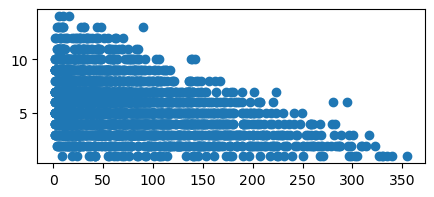

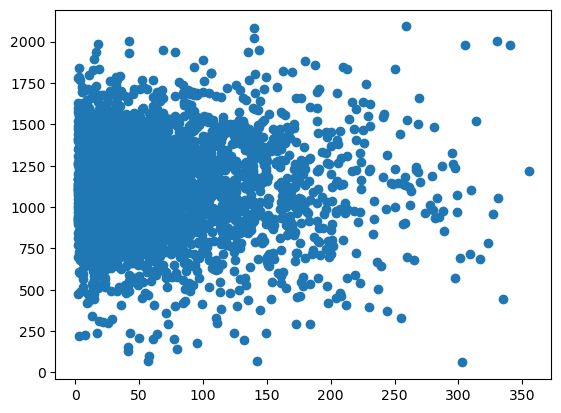

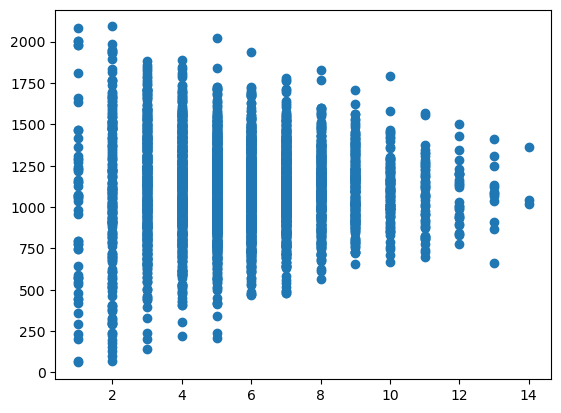

In [36]:
plt.figure(figsize =(5,2))
plt.scatter(RFM2['Recency'],RFM2['Frequency'])
plt.show()
plt.scatter(RFM2['Recency'],RFM2['Monetary'])
plt.show()
plt.scatter(RFM2['Frequency'],RFM2['Monetary'])
plt.show()

In [37]:
RFM_Cluster = RFM2[['Recency','Frequency','Monetary']]
scaler = StandardScaler() 
RFM_Cluster = scaler.fit_transform(RFM_Cluster)
RFM_Cluster

array([[-0.93163833,  2.30755079, -0.99171069],
       [ 1.14120008, -1.1544566 ,  0.97909304],
       [ 0.69579679,  1.00929802,  0.45914317],
       ...,
       [-0.17787891,  0.57654709, -0.03541925],
       [ 1.41529442,  0.14379617, -1.01101471],
       [ 0.38744066, -1.1544566 , -2.12085382]])

In [38]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Cluster)
    kmeanModel.fit(RFM_Cluster)
    distortions.append(sum(np.min(cdist(RFM_Cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / RFM_Cluster.shape[0])

C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

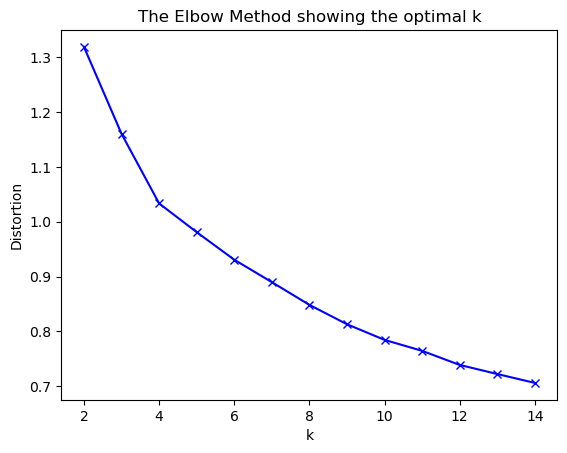

In [39]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#distortion = the values calculated with the cost function

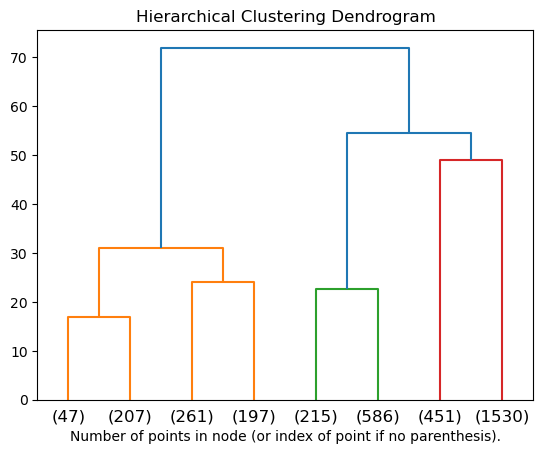

In [40]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(RFM_Cluster)

import matplotlib.pyplot as plt
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [41]:
model = AgglomerativeClustering(n_clusters=8)
model = model.fit(RFM_Cluster)
model.labels_
RFM2['Hie'] = model.labels_
RFM2[["Hie","Recency","Frequency","Monetary"]].groupby('Hie').aggregate(['mean'])

,Recency,Frequency,Monetary
,mean,mean,mean
Hie,,,
0,38.876630,6.427282,1195.831248
1,33.450512,4.056314,859.682407
2,184.817259,3.010152,750.199922
3,49.403548,3.822616,1445.190425
4,43.690432,9.360225,1113.481138
5,162.181102,4.078740,1377.266531
6,119.172414,4.605364,1008.571350
7,41.046512,6.855814,758.200854


In [42]:
dict_hie2 = {  0:"Potential Loyalists",
                 1:"Promising",
                 2:"Hiberating",
                 3:"Long time big buy",
                 4:"loyalty",
                 5:"At risk",
                 6:"need attention",
                 7:"Small basket size"
             }

In [43]:
RFM2['Hie'] = RFM2['Hie'].map(dict_hie2)

In [44]:
model = KMeans(n_clusters=8)
model = model.fit(RFM_Cluster)
model.labels_

RFM2['Kmean'] = model.labels_

RFM2[["Kmean","Recency","Frequency","Monetary"]].groupby('Kmean').aggregate(['mean'])

C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,Monetary
,mean,mean,mean
Kmean,,,
0,27.697368,5.681579,976.806445
1,156.114894,3.531915,1473.093240
2,33.475248,9.394059,1028.698066
3,36.464789,7.203219,1359.494220
4,209.000000,3.121693,875.775712
5,104.493776,5.514523,1086.517183
6,59.194203,3.736232,679.966798
7,38.270270,3.729730,1367.207827


In [45]:
dict_kmean2 = {  0:"Potential Loyalists",
                 1:"Long time big buy",
                 2:"At risk",
                 3:"Small basket size",
                 4:"need attention",
                 5:"loyalty",
                 6:"Promising",
                 7:"Hibernating"
             }
dict_kmean2

{0: 'Potential Loyalists',
 1: 'Long time big buy',
 2: 'At risk',
 3: 'Small basket size',
 4: 'need attention',
 5: 'loyalty',
 6: 'Promising',
 7: 'Hibernating'}

In [46]:
RFM2['Kmean'] = RFM2['Kmean'].map(dict_kmean2)

In [47]:
RFM2

,customer_id,Recency,Frequency,Monetary,Hie,Kmean
0,1,9,11,825.859091,loyalty,At risk
1,2,130,3,1383.023333,At risk,Long time big buy
2,3,104,8,1236.028750,loyalty,loyalty
3,4,197,2,523.860000,Hiberating,need attention
4,5,18,6,983.866667,Potential Loyalists,Potential Loyalists
...,...,...,...,...,...,...
3489,3497,54,3,1248.023333,Long time big buy,Hibernating
3490,3498,129,6,862.843333,need attention,loyalty
3491,3499,53,7,1096.211429,Potential Loyalists,Potential Loyalists
3492,3500,146,6,820.401667,need attention,loyalty


In [48]:
pd.crosstab(RFM2['Hie'], RFM2['Kmean'])

Kmean,At risk,Hibernating,Long time big buy,Potential Loyalists,Promising,Small basket size,loyalty,need attention
Hie,,,,,,,,
At risk,0,1,162,0,0,0,70,21
Hiberating,0,0,0,0,53,0,13,131
Long time big buy,0,365,61,6,0,18,1,0
Potential Loyalists,38,38,0,383,0,411,127,0
Promising,0,68,0,279,228,0,11,0
Small basket size,61,0,0,92,50,0,12,0
loyalty,406,0,3,0,0,68,56,0
need attention,0,9,9,0,14,0,192,37


In [57]:
RFM2.to_csv("C:/Users/matages/Desktop/Customer Segmentation/RFM/RFM.csv")

Kmean and hierachical have some same result

# try using quentile to segment

In [49]:
RFM_quentile = RFM2[["customer_id","Recency","Frequency","Monetary"]]
RFM_quentile

,customer_id,Recency,Frequency,Monetary
0,1,9,11,825.859091
1,2,130,3,1383.023333
2,3,104,8,1236.028750
3,4,197,2,523.860000
4,5,18,6,983.866667
...,...,...,...,...
3489,3497,54,3,1248.023333
3490,3498,129,6,862.843333
3491,3499,53,7,1096.211429
3492,3500,146,6,820.401667


In [50]:
RFM_quentile["R"] = pd.qcut(RFM_quentile["Recency"], 4, labels=[4, 3, 2, 1])

C:\Users\matages\AppData\Local\Temp\ipykernel_2876\4017240138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_quentile["R"] = pd.qcut(RFM_quentile["Recency"], 4, labels=[4, 3, 2, 1])


In [51]:
def score(x,y):
    if   y <= x.quantile(0.25):
        return 1
    elif y <= x.quantile(0.5):
        return 2
    elif y <+ x.quantile(0.75):
        return 3
    else :
        return 4

In [52]:
for i in ["Frequency","Monetary"]:
    RFM_quentile[i[0]] = RFM_quentile[i].apply(lambda y: score(RFM_quentile[i],y))

In [53]:
RFM_quentile

,customer_id,Recency,Frequency,Monetary,R,F,M
0,1,9,11,825.859091,4,4,1
1,2,130,3,1383.023333,1,1,4
2,3,104,8,1236.028750,1,4,3
3,4,197,2,523.860000,1,1,1
4,5,18,6,983.866667,4,2,2
...,...,...,...,...,...,...,...
3489,3497,54,3,1248.023333,2,1,3
3490,3498,129,6,862.843333,1,2,1
3491,3499,53,7,1096.211429,2,4,2
3492,3500,146,6,820.401667,1,2,1


In [58]:
RFM_quentile.to_csv("C:/Users/matages/Desktop/Customer Segmentation/RFM/RFM_Rulebase.csv")

In [71]:
Segment_Rulebase = pd.read_csv("C:/Users/matages/Desktop/Customer Segmentation/RFM/Segment_Rulebase.csv")

In [76]:
Segment_Rulebase.columns = ['customer_id', 'Rulebase']

In [81]:
Segment_Cluster  = RFM2[['customer_id','Hie','Kmean']]
Segment_Cluster.columns = ["customer_id",'Hierarchical', 'Kmean']

In [85]:
len(Segment_Rulebase)

3494

In [82]:
len(set(CDC["customer_id"]))

3912

In [83]:
len(CDC["customer_id"])

3912

In [127]:
Customer_info_segment = pd.merge(CDC,Segment_Rulebase,on='customer_id')
Customer_info_segment

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,fullname,AGE,Rulebase
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp,64,Hibernating
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman,37,New customers
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle,63,New customers
3,4,Talbot,missing,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,Talbot missing,56,Hibernating
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton,40,Promising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,Yes,19.0,Danya Burnyeat,31,Potential Loyalists
3412,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,Yes,18.0,Thia O'Day,31,Long time big buy
3413,3498,Lois,Abrahim,Female,28,1995-11-02,NaN,Manufacturing,Mass Customer,N,No,5.0,Lois Abrahim,22,Loyal customers
3414,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,NaN,Manufacturing,Mass Customer,N,Yes,7.0,Shelton Tewkesberrie,38,At risk


In [128]:
Customer_info_segment = pd.merge(Customer_info_segment,Segment_Cluster,on='customer_id')

In [129]:
CAC = pd.read_csv("C:/Users/matages/Desktop/Customer Segmentation/Clean_data/Customer_Address_clean.csv")

In [130]:
CAC = CAC.iloc[:,1:]

In [131]:
CAC

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [132]:
Customer_info_segment = pd.merge(Customer_info_segment,CAC,on='customer_id')

In [133]:
Customer_info_segment

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,fullname,AGE,Rulebase,Hierarchical,Kmean,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Laraine Medendorp,64,Hibernating,loyalty,At risk,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,Eli Bockman,37,New customers,At risk,Long time big buy,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,missing,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,Talbot missing,56,Hibernating,Hiberating,need attention,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,Sheila-kathryn Calton,40,Promising,Potential Loyalists,Potential Loyalists,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,...,Curr Duckhouse,51,New customers,Potential Loyalists,loyalty,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,Danya Burnyeat,31,Potential Loyalists,Hiberating,need attention,2565 Caliangt Point,2171,NSW,Australia,9
3408,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,Thia O'Day,31,Long time big buy,Long time big buy,Hibernating,96 Delladonna Trail,3976,VIC,Australia,5
3409,3498,Lois,Abrahim,Female,28,1995-11-02,NaN,Manufacturing,Mass Customer,N,...,Lois Abrahim,22,Loyal customers,need attention,loyalty,3 Nova Point,3012,VIC,Australia,4
3410,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,NaN,Manufacturing,Mass Customer,N,...,Shelton Tewkesberrie,38,At risk,Potential Loyalists,Potential Loyalists,310 Stephen Terrace,4073,QLD,Australia,9


In [134]:
Customer_info_segment.to_csv("C:/Users/matages/Desktop/Customer Segmentation/RFM/Customer_info_segment.csv")